## Assignment – High Frequency Words

Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


In [365]:
#from nltk.book import *
#*** Introductory Examples for the NLTK Book ***
#Loading text1, ..., text9 and sent1, ..., sent9
#Type the name of the text or sentence to view it.
#Type: 'texts()' or 'sents()' to list the materials.
#text1: Moby Dick by Herman Melville 1851
#text2: Sense and Sensibility by Jane Austen 1811
#text3: The Book of Genesis
#text4: Inaugural Address Corpus
#text5: Chat Corpus
#text6: Monty Python and the Holy Grail
#text7: Wall Street Journal
#text8: Personals Corpus
#text9: The Man Who Was Thursday by G . K . Chesterton 1908

#http://www.foo.be/cours/dess-20122013/b/Natural%20Language%20Processing%20with%20Python%20-%20O'Reilly2009.pdf
    
#!pip3 install jupyterlab...running into some issue with this classic notebook
#jupyter lab
#!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import (
    genesis,
    gutenberg,
    inaugural,
    nps_chat,
    treebank,
    webtext,
    wordnet,
    stopwords
)
from nltk.probability import FreqDist
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords 
from nltk.text import Text
from collections import Counter #
import re
import nltk
import string
from nltk.util import bigrams
#https://github.com/nltk/nltk/blob/develop/nltk/book.py
    

##### Choose a corpus of interest
Corpus from nltk book, called "The Book of Genesis"

In [366]:
text3 = Text(genesis.words("english-kjv.txt"), name="The Book of Genesis")
print("text3:", text3.name)

text3: The Book of Genesis


In [367]:
text3 = genesis.raw('english-kjv.txt')
text3

"In the beginning God created the heaven and the earth.\nAnd the earth was without form, and void; and darkness was\nupon the face of the deep. And the Spirit of God moved upon\nthe face of the waters.\nAnd God said, Let there be light: and there was light.\nAnd God saw the light, that it was good: and God divided the\nlight from the darkness.\nAnd God called the light Day, and the darkness he called\nNight. And the evening and the morning were the first day.\nAnd God said, Let there be a firmament in the midst of the\nwaters, and let it divide the waters from the waters.\nAnd God made the firmament, and divided the waters which were\nunder the firmament from the waters which were above the\nfirmame and it was so.\nAnd God called the firmament Heaven. And the evening and the\nmorning were the second day.\nAnd God said, Let the waters under the heaven be gathered\ntogether unto one place, and let the dry land appe and it\nwas so.\nAnd God called the dry land Earth; and the gathering tog

###### Cleaning up the book of genesis

###### how many words are in the book of genesis


In [368]:
#len(text3) #44764
print('Total Words: ', len(text3))

Total Words:  195515


In [369]:
# split into words
tokens =  word_tokenize(text3)
print(tokens)

['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.', 'And', 'the', 'earth', 'was', 'without', 'form', ',', 'and', 'void', ';', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', '.', 'And', 'the', 'Spirit', 'of', 'God', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', '.', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'light', ':', 'and', 'there', 'was', 'light', '.', 'And', 'God', 'saw', 'the', 'light', ',', 'that', 'it', 'was', 'good', ':', 'and', 'God', 'divided', 'the', 'light', 'from', 'the', 'darkness', '.', 'And', 'God', 'called', 'the', 'light', 'Day', ',', 'and', 'the', 'darkness', 'he', 'called', 'Night', '.', 'And', 'the', 'evening', 'and', 'the', 'morning', 'were', 'the', 'first', 'day', '.', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.', 'And', 'God', 'made', 'the'

In [370]:
print('Total Tokens after removing all white space: ', len(tokens))

Total Tokens after removing all white space:  44502


###### convert to lower case, normalization 

In [371]:
tokens = [word.lower() for word in tokens]
print(words[:50])

['beginning', 'god', 'created', 'heaven', 'earth', 'earth', 'without', 'form', 'void', 'darkness', 'upon', 'face', 'deep', 'spirit', 'god', 'moved', 'upon', 'face', 'waters', 'god', 'said', 'let', 'light', 'light', 'god', 'saw', 'light', 'good', 'god', 'divided', 'light', 'darkness', 'god', 'called', 'light', 'day', 'darkness', 'called', 'night', 'evening', 'morning', 'first', 'day', 'god', 'said', 'let', 'firmament', 'midst', 'waters', 'let']


###### remove all tokens that are not alphabetic


In [372]:
###### Checking if any punctuation from each word

#words = [word for word in tokens if word.isalpha()]
#print(words[:50])
#len(words)

table = str.maketrans('', '', string.punctuation)
stripped = [word.translate(table) for word in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
print(words[:50])
print('\n')
print('Total stripped words or total words after non-alphabetic words were removed ', len(words))


['in', 'the', 'beginning', 'god', 'created', 'the', 'heaven', 'and', 'the', 'earth', 'and', 'the', 'earth', 'was', 'without', 'form', 'and', 'void', 'and', 'darkness', 'was', 'upon', 'the', 'face', 'of', 'the', 'deep', 'and', 'the', 'spirit', 'of', 'god', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', 'and', 'god', 'said', 'let', 'there', 'be', 'light', 'and', 'there', 'was', 'light']


Total stripped words or total words after non-alphabetic words were removed  38486


###### Removing stopwords

In [373]:
#Stop words are common words like ‘the’, ‘and’, ‘I’, etc
stop_words = set(stopwords.words('english')) # extracting english stopwords
words = [word for word in words if not word in stop_words]
print(stop_words)
print('\n')
print('Total stopwords to be removed: ', len(stop_words))


{'we', 'has', 'each', 'such', 'o', "you've", 'where', 'hasn', 'above', 's', "you're", 'because', 'them', 'most', 'how', 'm', "it's", 'over', 'an', 'doesn', 'were', 'few', 'some', 'ourselves', 'while', 'there', "couldn't", 'does', 'any', 'on', 'against', 't', "hasn't", "won't", 'shan', 'am', 'll', 'very', 'didn', 'hadn', 'off', 'after', 'all', 'its', 'she', 'between', "she's", 'doing', 'can', 'having', 'nor', 'below', 'will', 'too', "didn't", 'ain', "shouldn't", 'himself', 'once', 'being', 'our', 'under', 'about', 'yourself', 'the', 'further', 'from', 'had', "doesn't", "don't", 'they', 'their', 'those', 'or', 'by', 'that', "needn't", 'why', 'been', 'then', 'more', 'shouldn', 'd', "mustn't", 'as', "aren't", 'during', 'don', 'now', 're', 'who', 'same', 'whom', 'a', 'just', 'y', 'i', "mightn't", 'myself', "isn't", 'up', 'what', 'aren', "you'd", 'down', 'needn', 'won', 'me', 'theirs', 'couldn', 'isn', 'at', "you'll", 'but', 'when', 'should', 'other', 'weren', 've', 'than', 'which', 'through

In [374]:
#print(words[:200])
print('Total words after stopword removed: ', len(words))


Total words after stopword removed:  18324


###### Find Unique Words

Unique Words are distinct words that are not stopwords, puntuaction words

In [375]:
#len(set(words))

print('\nAll unique words:')
print('\n')
unique = sorted(set(words))
print(unique)
print('\n')
len(set(words))



All unique words:


['abated', 'abel', 'abelmizraim', 'abidah', 'abide', 'abimael', 'abimelech', 'able', 'abode', 'abomination', 'abr', 'abrah', 'abraham', 'abram', 'abrams', 'abroad', 'absent', 'abundantly', 'accad', 'accept', 'accepted', 'according', 'achbor', 'acknowledged', 'activity', 'adah', 'adam', 'adbeel', 'add', 'adder', 'admah', 'adullamite', 'afar', 'afflict', 'affliction', 'afraid', 'afterward', 'afterwards', 'aga', 'age', 'aholibamah', 'ahuzzath', 'aileth', 'air', 'ajah', 'akan', 'al', 'alive', 'allonbachuth', 'almighty', 'almodad', 'almon', 'alo', 'alone', 'aloud', 'also', 'altar', 'altogether', 'alvah', 'alvan', 'always', 'amal', 'amalek', 'amalekites', 'ammon', 'among', 'amongst', 'amorite', 'amorites', 'amraphel', 'anah', 'anamim', 'aner', 'angel', 'angels', 'anger', 'angry', 'anguish', 'anointedst', 'anoth', 'another', 'answer', 'answered', 'anything', 'appe', 'appear', 'appeared', 'appease', 'appoint', 'appointed', 'aprons', 'aram', 'aran', 'ararat', 'arbah', 'arch

2503

In [376]:
##### Another way
#count = 0
#unique = []
#for word in words:
#    if word not in unique:
#        unique.append(word)
#    count +=1
#sort
#unique.sort()

#print
#print(unique[:300])
#print('\n')
#print('Total Unique words: ', count) 
#len(unique)

###### Taking the most common words, how many unique words represent half of the total words in the corpus?


In [377]:
#Not sure i understand this question. how many unique words represent half of the total words in the corpus(after cleaning)
#I want to say you find unique words with their occurrence and count everything to equal len(corpus)/2, 18324/2 = 9162
nltk.FreqDist(words[10:])
new_words = nltk.FreqDist(words)
print('\nFind the occurences of one unique word from the cleaned corpus: Example "lord" appears: ', new_words['lord'])


Find the occurences of one unique word from the cleaned corpus: Example "lord" appears:  207


In [378]:
cum_freq = 0
n = 0

new_words.items()
for key, freq in new_words.items():
    if key in unique:
        print(str(key)+ ':' + str(freq))
        n +=1
        cum_freq = freq + cum_freq
        if cum_freq >= 9162: # (len(words)/2):
            break 



beginning:5
god:230
created:11
heaven:29
earth:112
without:9
form:1
void:1
darkness:4
upon:140
face:47
deep:6
spirit:5
moved:2
waters:32
said:477
let:93
light:11
saw:57
good:44
divided:10
called:98
day:72
night:28
evening:10
morning:20
first:16
firmament:8
midst:6
divide:5
made:72
firmame:1
second:14
gathered:15
together:16
unto:598
one:70
place:46
dry:4
land:184
appe:1
gathering:2
se:4
bring:48
forth:43
grass:2
herb:7
yielding:5
seed:58
fruit:9
tree:21
kind:13
whose:19
ear:9
brought:60
ki:5
third:10
lights:3
signs:1
seasons:1
days:61
yea:15
give:67
two:54
great:32
greater:5
rule:5
lesser:1
nig:1
stars:5
also:83
set:32
darkne:1
fourth:3
abundantly:4
moving:2
creature:8
hath:80
life:31
fowl:16
may:43
fly:1
open:2
whales:1
every:91
living:16
moveth:3
winged:1
blessed:46
saying:79
fruitful:14
multiply:18
fill:3
seas:1
fifth:5
cattle:50
creeping:9
thing:39
beast:20
creepeth:8
us:93
make:48
man:113
image:5
likene:1
dominion:4
fish:2
sea:8
air:8
male:12
female:7
replenish:2
subdue:1
behold:1

In [379]:
print(cum_freq)
print('\n')
print(n)

9175


369


In [380]:
It is hard to find the exact number of unique words representing the half of the total corpus.
I found 369 unique words by approximation ((9175-9162)/9162)x100 = +0.14% ...very close, it is possible to see this value graphically

SyntaxError: invalid syntax (1252761749.py, line 1)

In [381]:
#counts = Counter(words)
#print(counts)
#numbers = 0
#for word , freq in counts.most_common():
#    if word in unique:
#        numbers +=1
#        if numbers >= len(words)/2:
            #print('The numbers of unique words representing half of total most common corpus is : ' , numbers)
#            print(numbers)
#            break
            
     

###### Identify the 200 highest frequency words in this corpus.

In [382]:
#nltk.FreqDist(words).most_common(200)


In [383]:
print('\nTop 200 highest frequency words in this corpus are: ')

### Another way
#Counter() function will return a dictionary which appears to be unordered.
#We need to sort this dictionary based on the number of counts that are in each element using most_common()

#counts = Counter(words)
for word in counts.most_common(20): #can set to 200
    print(word[0], '\t', word[1]) 


Top 200 highest frequency words in this corpus are: 
unto 	 598
said 	 477
thou 	 284
thy 	 278
shall 	 259
thee 	 257
god 	 230
lord 	 207
father 	 196
land 	 184
jacob 	 178
came 	 177
joseph 	 157
son 	 149
sons 	 145
upon 	 140
abraham 	 129
behold 	 118
man 	 113
earth 	 112


In [384]:
The white space or empty space next to some words like Abraham may have occured due to words being removed by stopwords.

SyntaxError: invalid syntax (3959514217.py, line 1)

###### Create a graph that shows the relative frequency of these 200 words

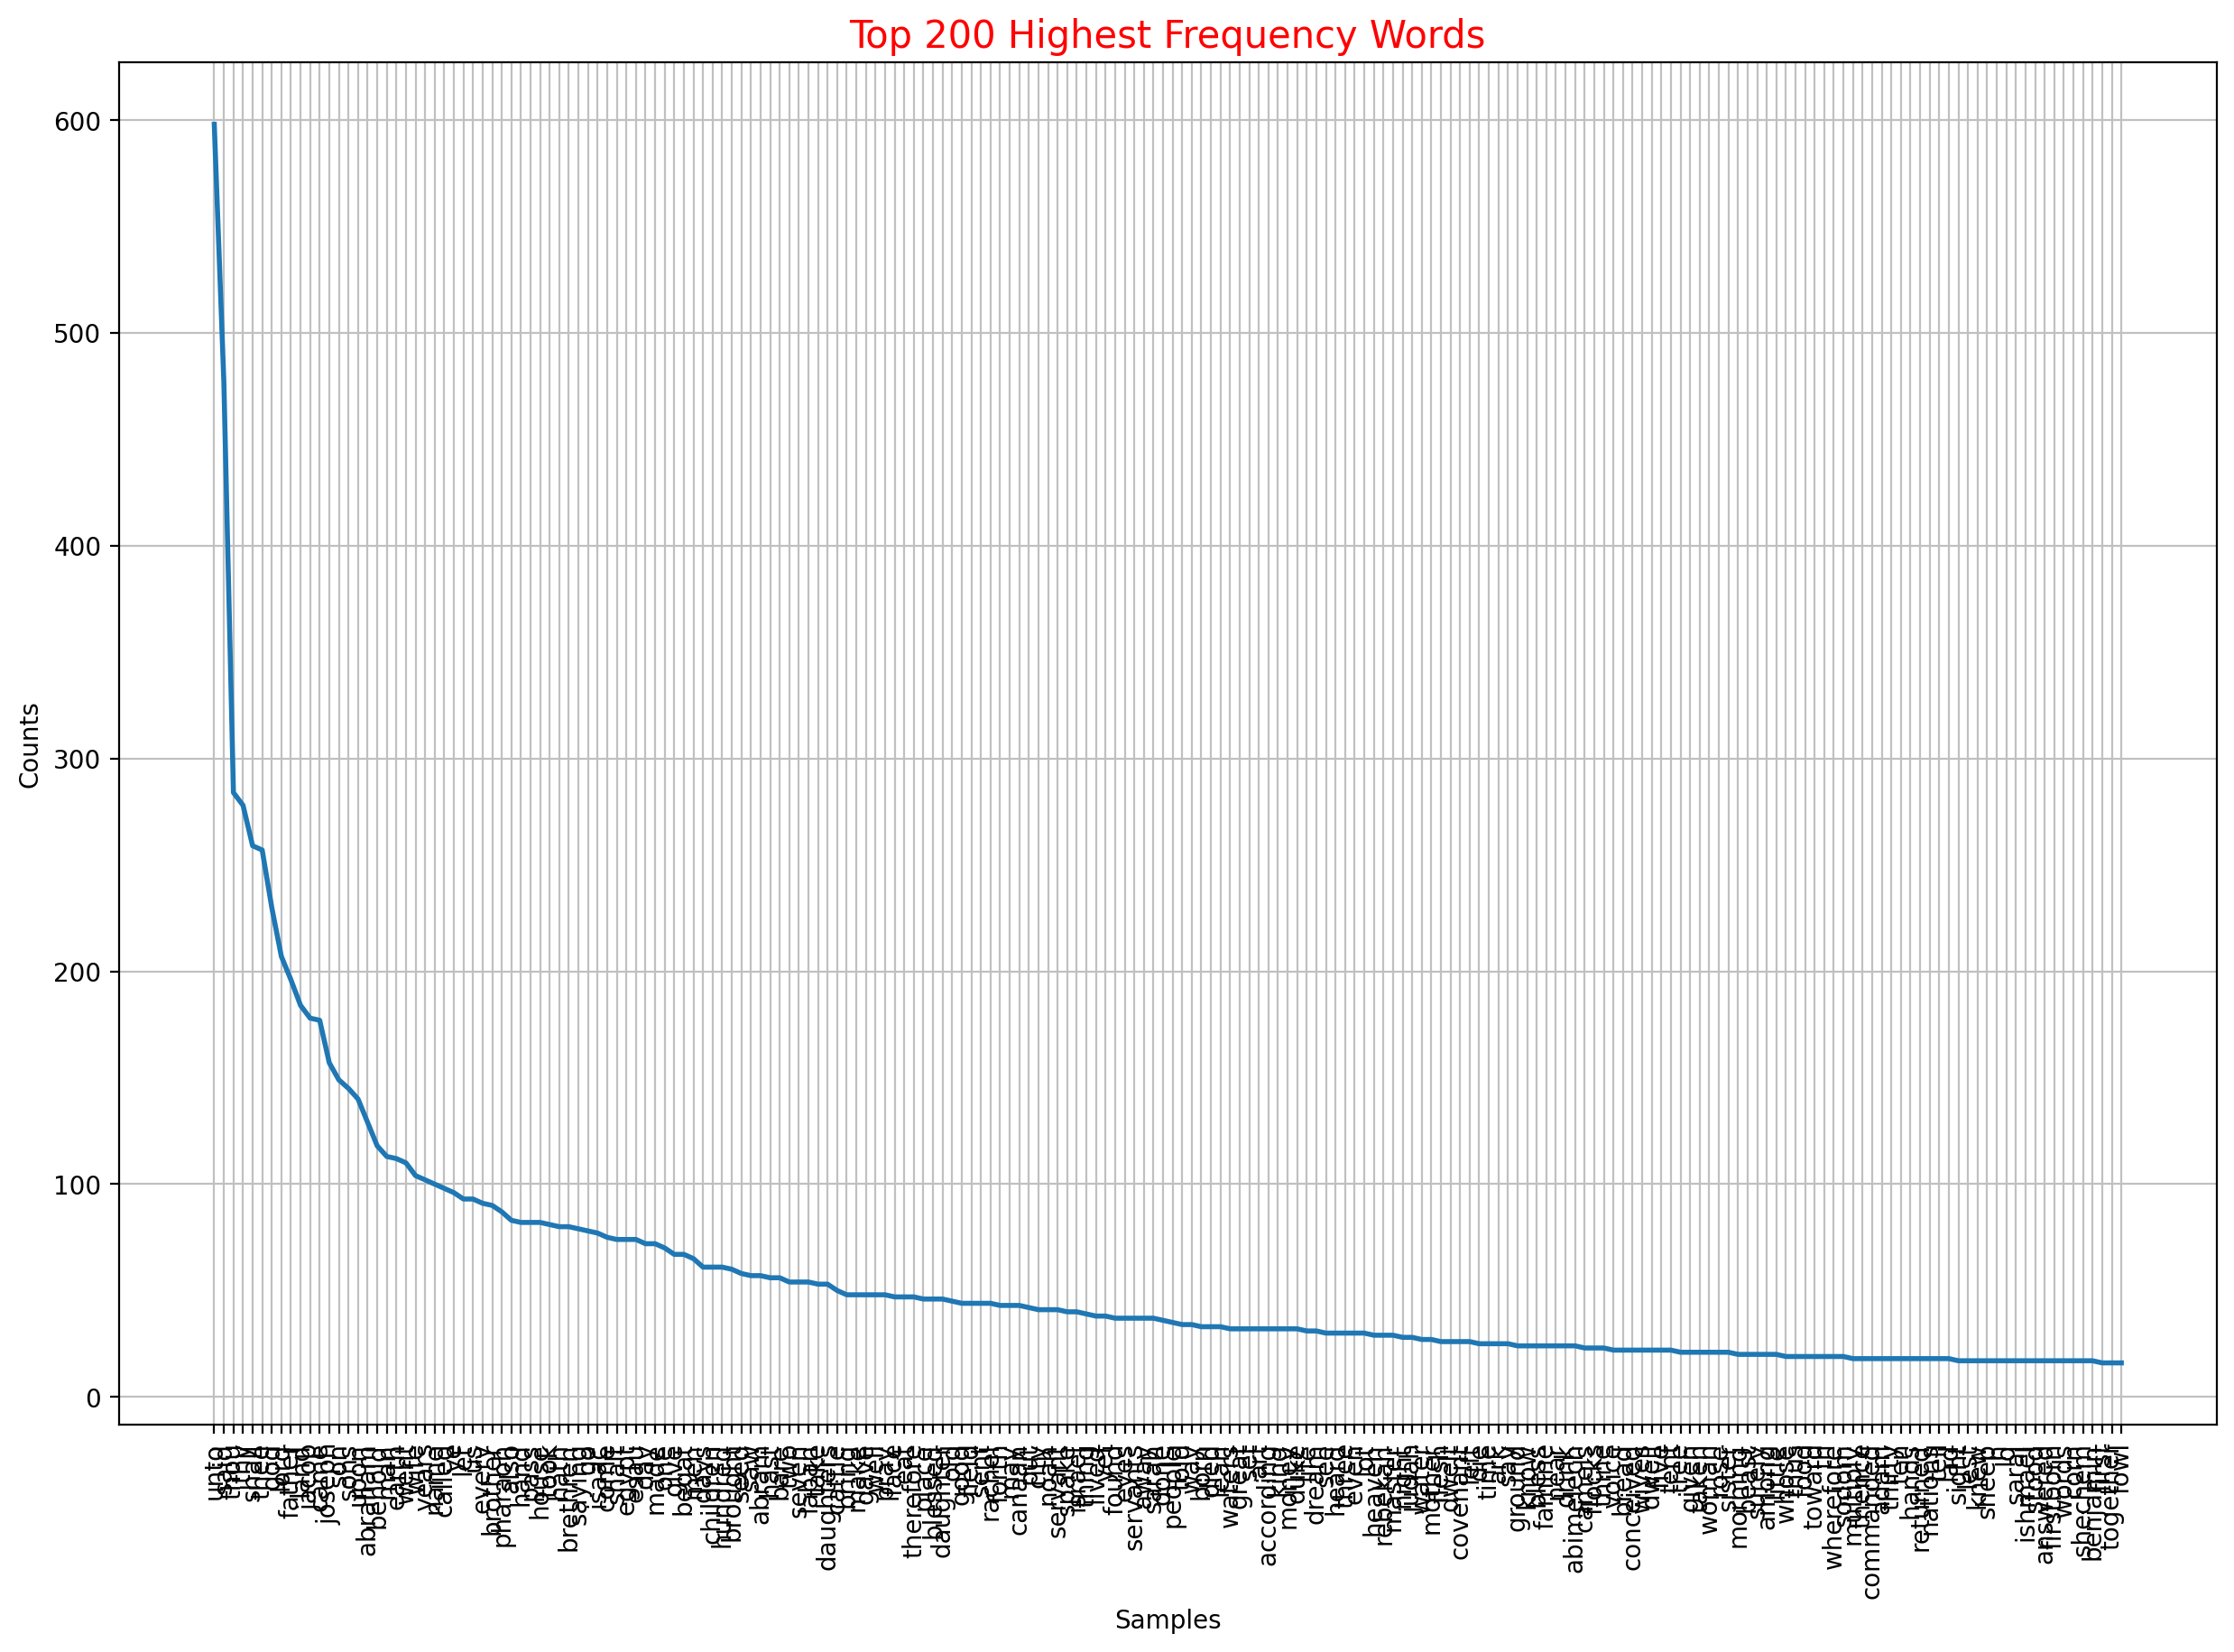

<AxesSubplot:title={'center':'Top 200 Highest Frequency Words'}, xlabel='Samples', ylabel='Counts'>

In [385]:
fig = plt.figure(1, figsize=(15,10), dpi=200)
# displaying the title
plt.title(label="Top 200 Highest Frequency Words",fontsize=15,color="red")
common_word = nltk.FreqDist(words) #.most_common(200)
#common_word
common_word.plot(200)


###### let's see plot(line type) the cumulative Frequency of the corpus

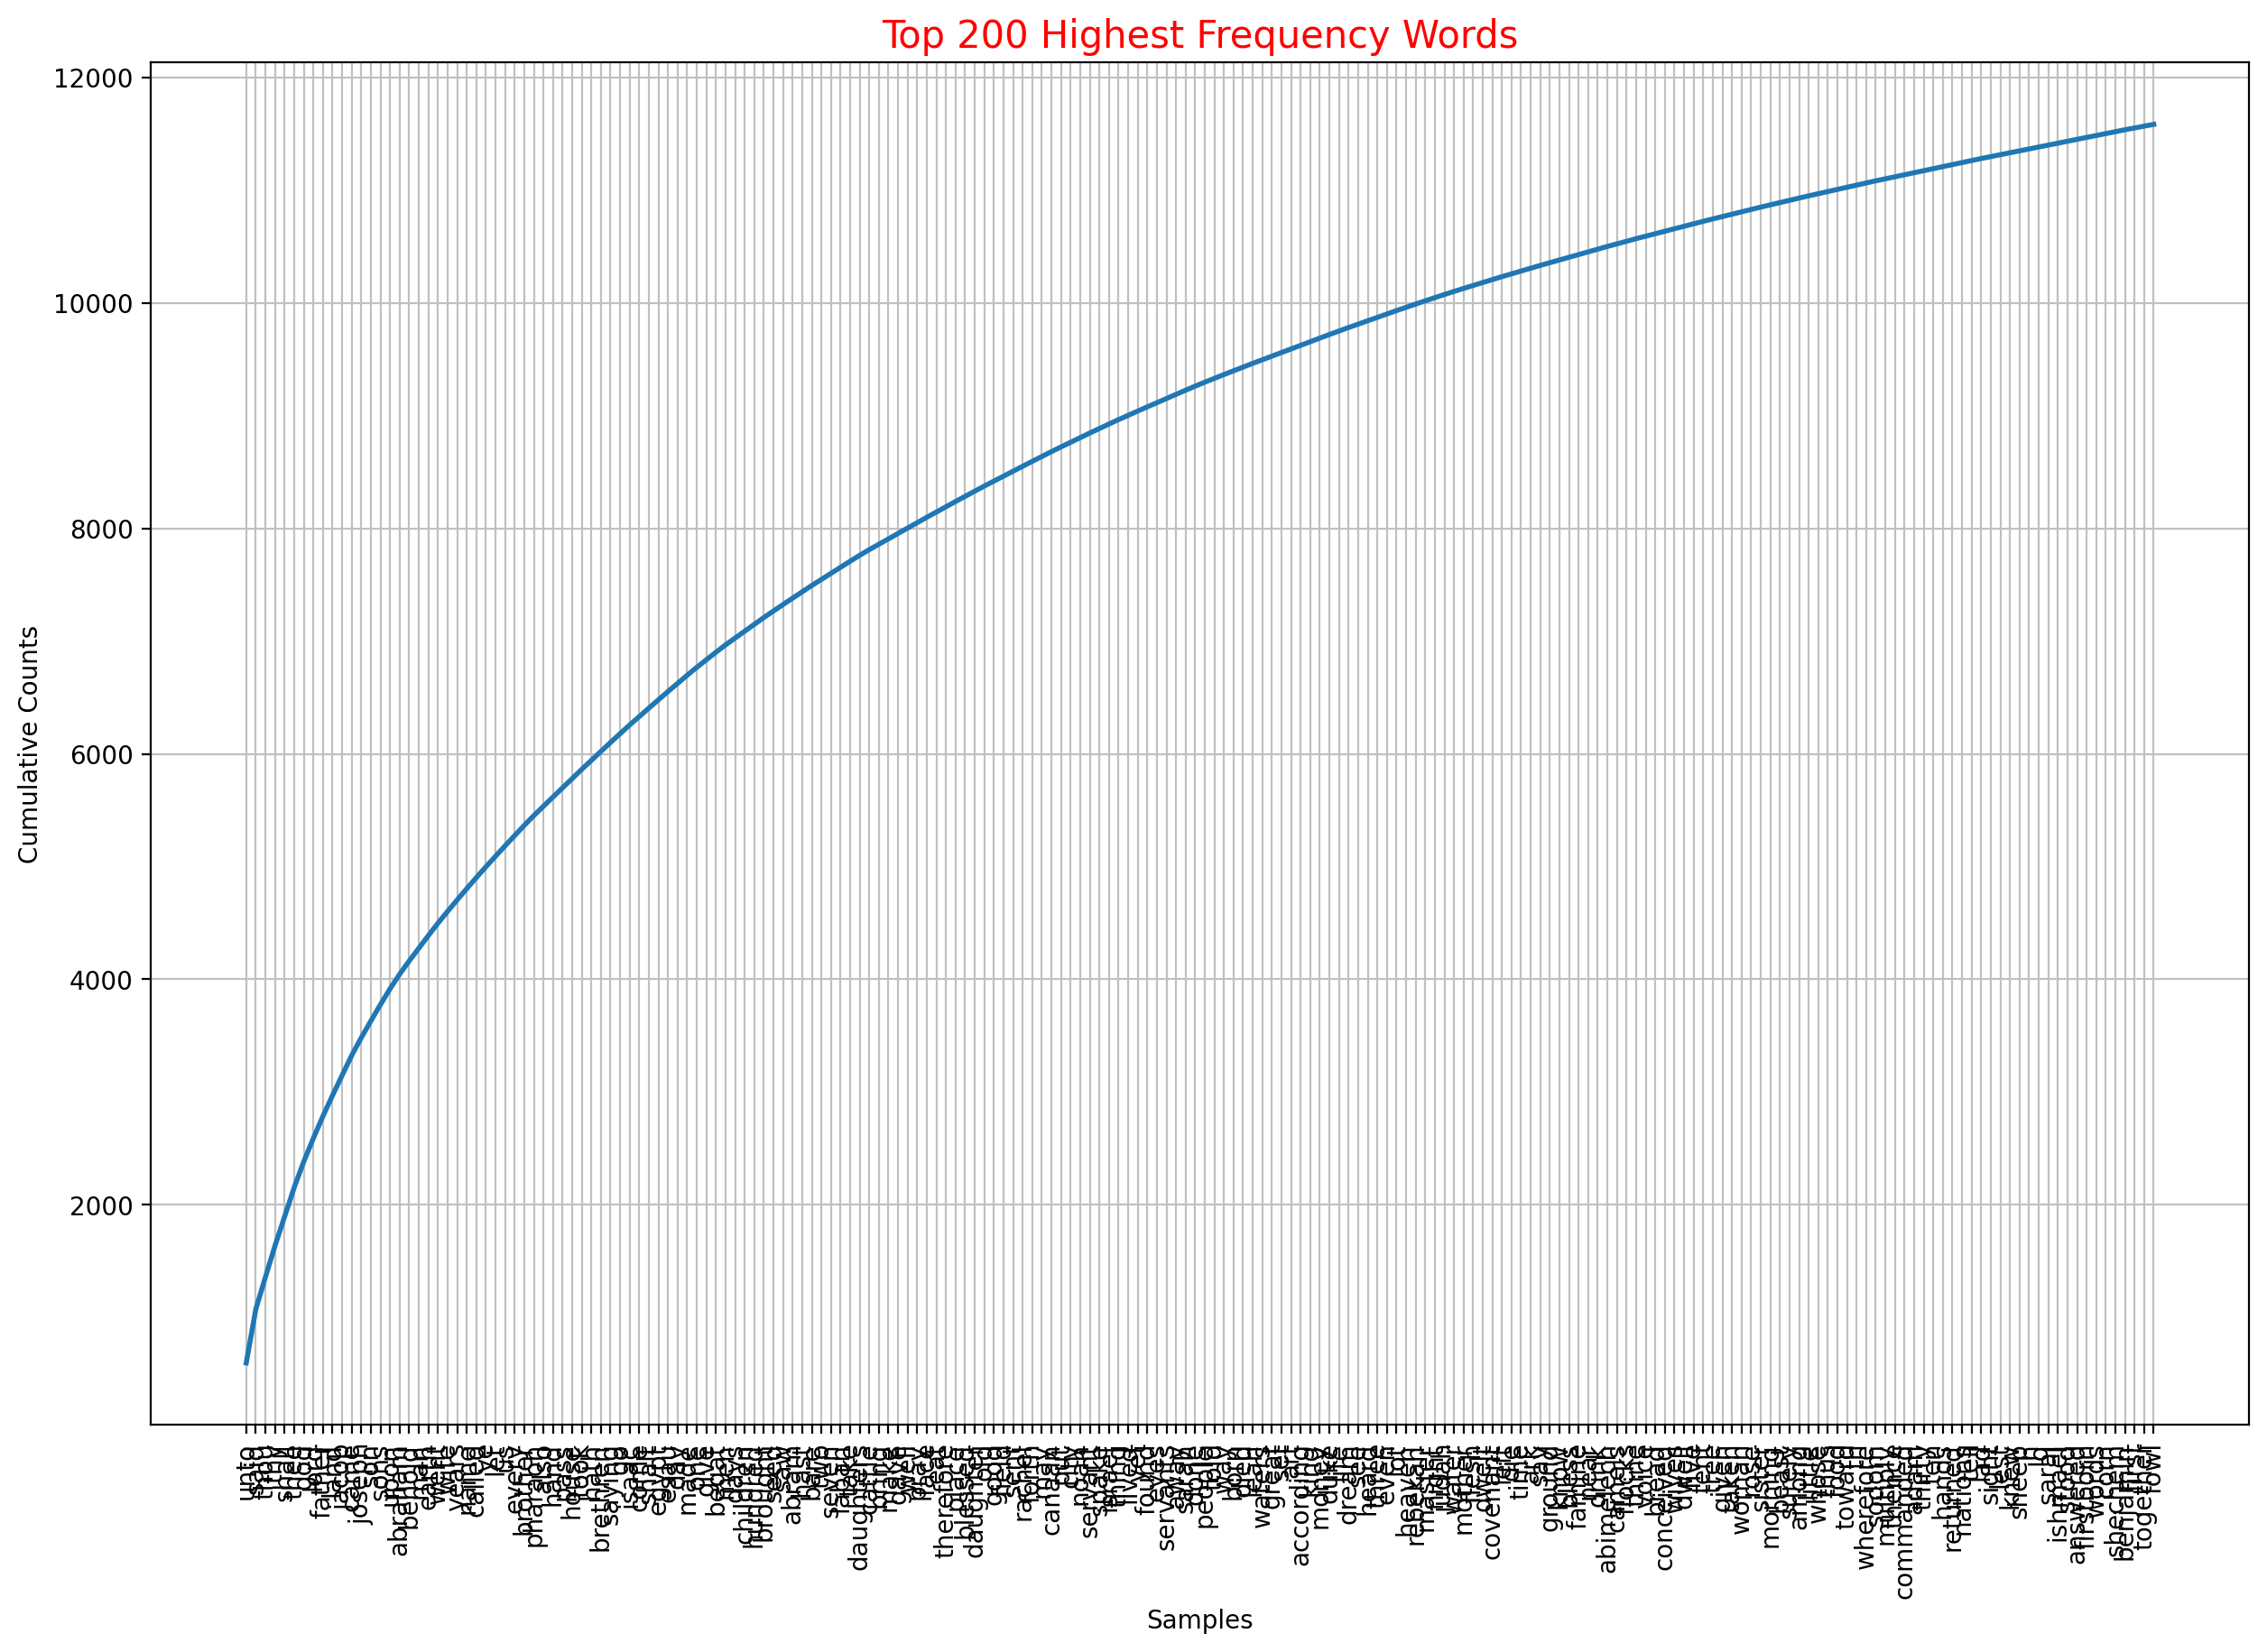

<AxesSubplot:title={'center':'Top 200 Highest Frequency Words'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [386]:
fig = plt.figure(1, figsize=(15,10), dpi=200)
# displaying the title
plt.title(label="Top 200 Highest Frequency Words",fontsize=15,color="red")
common_word = nltk.FreqDist(words) #.most_common(200)
#common_word
common_word.plot(200, cumulative = True)


###### let's see plot(line type) the Frequency of the unique words

In [387]:
new_words.items()
uniques = {}
m = 0
for key in words:
    if key in unique:
       uniques[m] = key
    m +=1
    #if m ==500:
    #        break
        
#uniques = [ i for i in uniques if not i.isdigit()]

uniques = [v for k, v in uniques.items()]
uniques

['beginning',
 'god',
 'created',
 'heaven',
 'earth',
 'earth',
 'without',
 'form',
 'void',
 'darkness',
 'upon',
 'face',
 'deep',
 'spirit',
 'god',
 'moved',
 'upon',
 'face',
 'waters',
 'god',
 'said',
 'let',
 'light',
 'light',
 'god',
 'saw',
 'light',
 'good',
 'god',
 'divided',
 'light',
 'darkness',
 'god',
 'called',
 'light',
 'day',
 'darkness',
 'called',
 'night',
 'evening',
 'morning',
 'first',
 'day',
 'god',
 'said',
 'let',
 'firmament',
 'midst',
 'waters',
 'let',
 'divide',
 'waters',
 'waters',
 'god',
 'made',
 'firmament',
 'divided',
 'waters',
 'firmament',
 'waters',
 'firmame',
 'god',
 'called',
 'firmament',
 'heaven',
 'evening',
 'morning',
 'second',
 'day',
 'god',
 'said',
 'let',
 'waters',
 'heaven',
 'gathered',
 'together',
 'unto',
 'one',
 'place',
 'let',
 'dry',
 'land',
 'appe',
 'god',
 'called',
 'dry',
 'land',
 'earth',
 'gathering',
 'together',
 'waters',
 'called',
 'se',
 'god',
 'saw',
 'good',
 'god',
 'said',
 'let',
 'eart

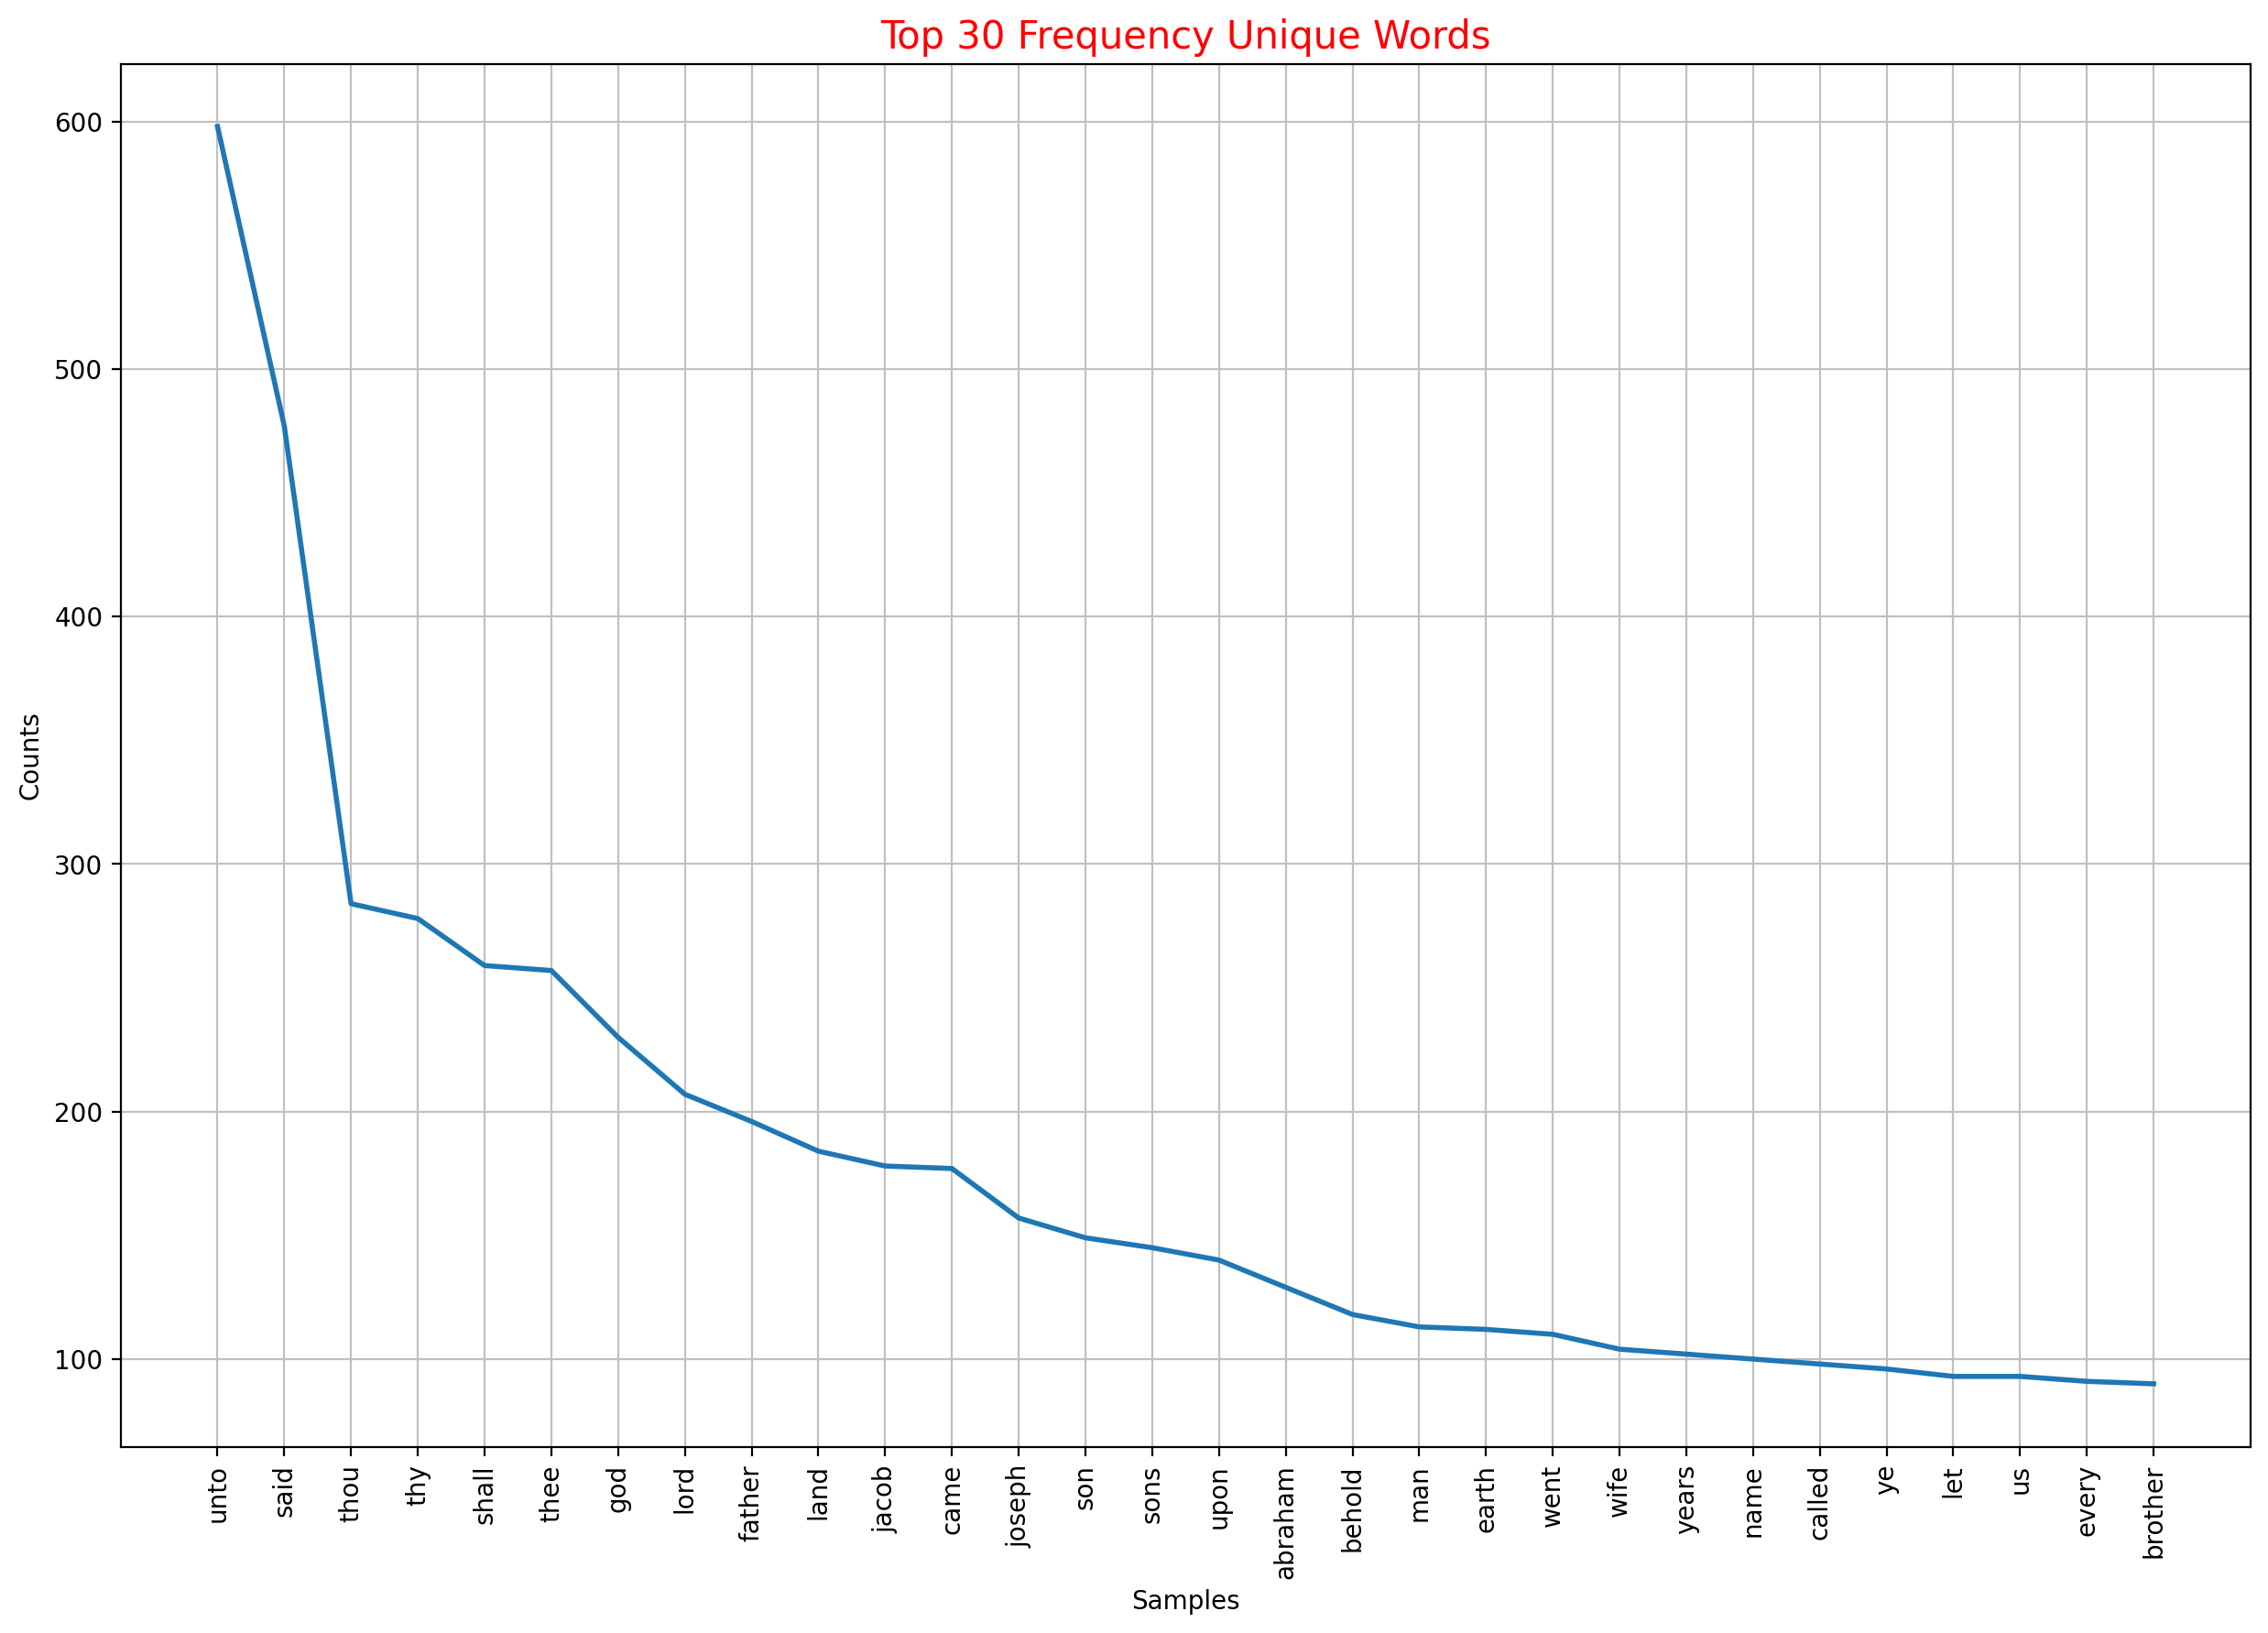

<AxesSubplot:title={'center':'Top 30 Frequency Unique Words'}, xlabel='Samples', ylabel='Counts'>

In [388]:
        

fig = plt.figure(1, figsize=(15,10), dpi=200)
# displaying the title
plt.title(label="Top 30 Frequency Unique Words",fontsize=15,color="red")
unique_word = nltk.FreqDist(uniques)  #.most_common(200)
#unique_word
unique_word.plot(30)#30, cumulative = True)


###### let's see plot(line type) the cumulative Frequency of the unique words

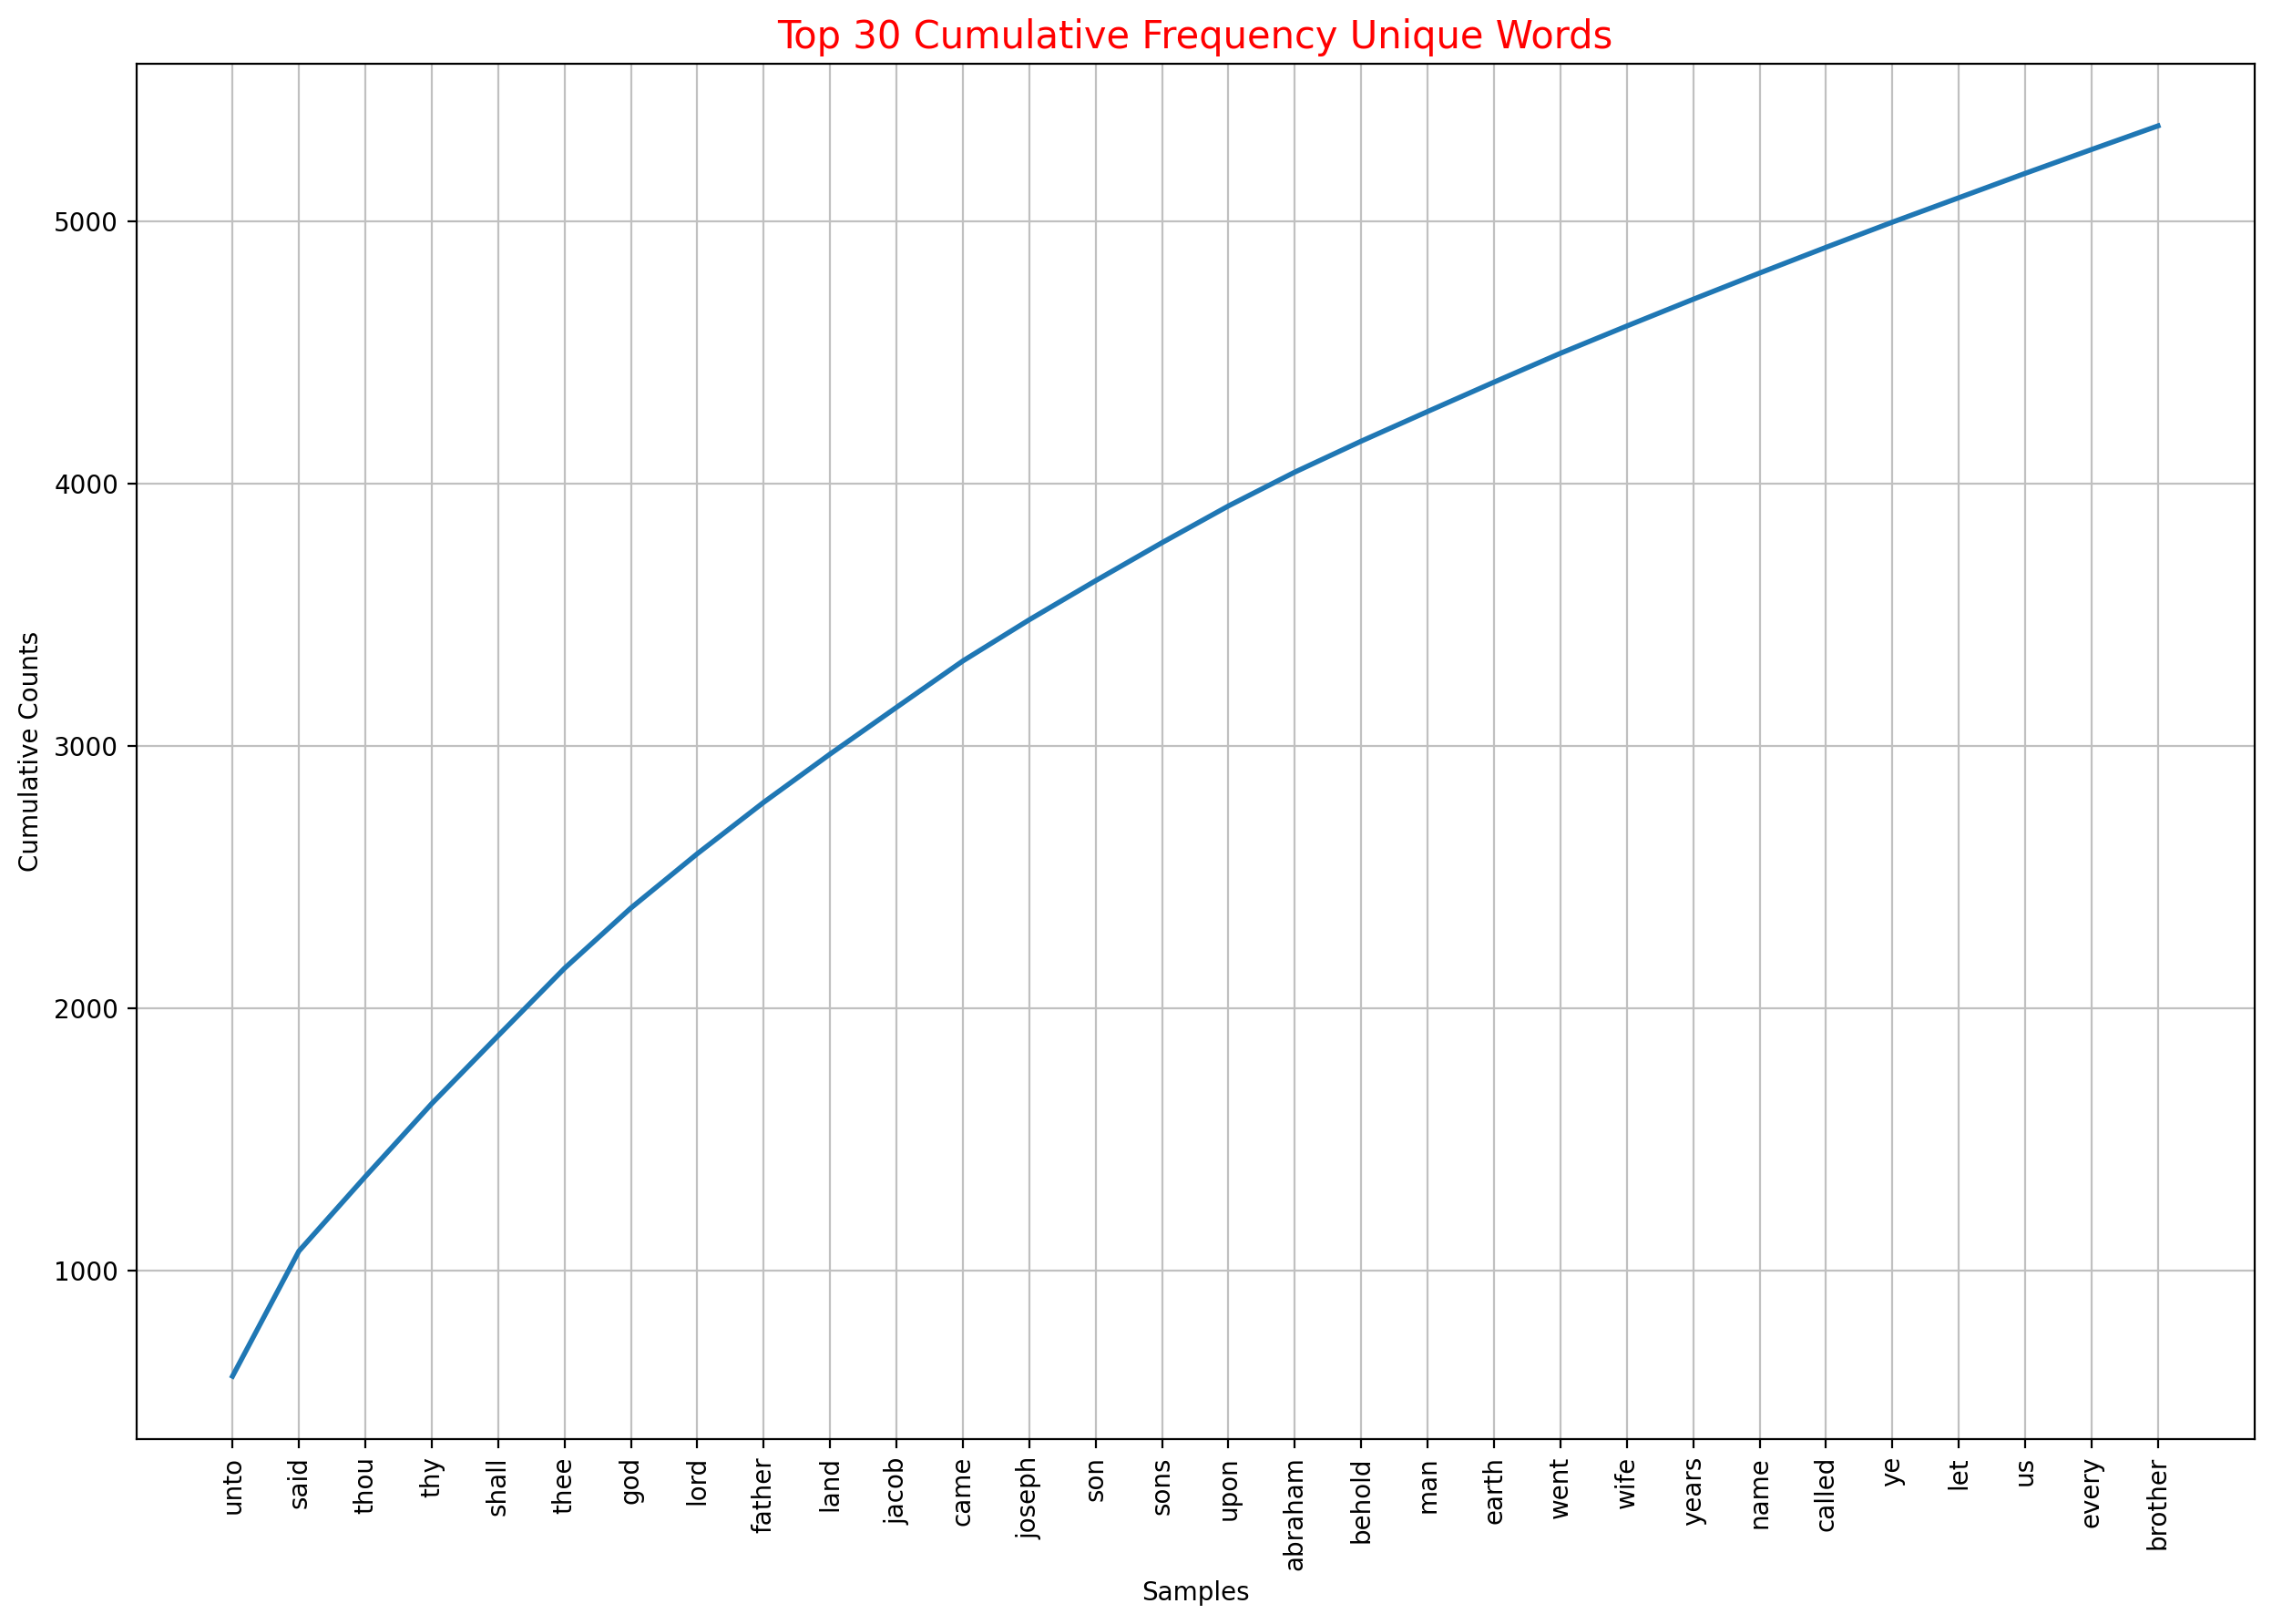

<AxesSubplot:title={'center':'Top 30 Cumulative Frequency Unique Words'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [389]:
fig = plt.figure(1, figsize=(15,10), dpi=200)
# displaying the title
plt.title(label="Top 30 Cumulative Frequency Unique Words",fontsize=15,color="red")
unique_word.plot(30, cumulative = True)


In [390]:
#new_words.items()
#uniques = {}
#m = 0
#for key, freq in new_words.items():
#    if key in unique:
#       uniques[m] = key,freq
#    m +=1
#    if m ==500:
#            break
        
#uniques

In [391]:
# Try a different way for unique words

#df_u = pd.DataFrame(data = uniques, columns = ['word','count'])
#df_u.style.hide_index()
#df_u= pd.DataFrame([{'word': k, 'count': (v['count'].sum())} for k,v in df_u.groupby(['word'])], columns = ['word','count'])
#df200w.plot(kind="line", x="word", y="count", figsize = (20,10))
#df_u.plot(kind="line", x="word", y="count",title = "Unique words", figsize = (20,10))


###### let's see plot(bar type) the cumulative Frequency of the corpus

<AxesSubplot:title={'center':'The Top 20 most common word or highest frequency words'}, xlabel='word'>

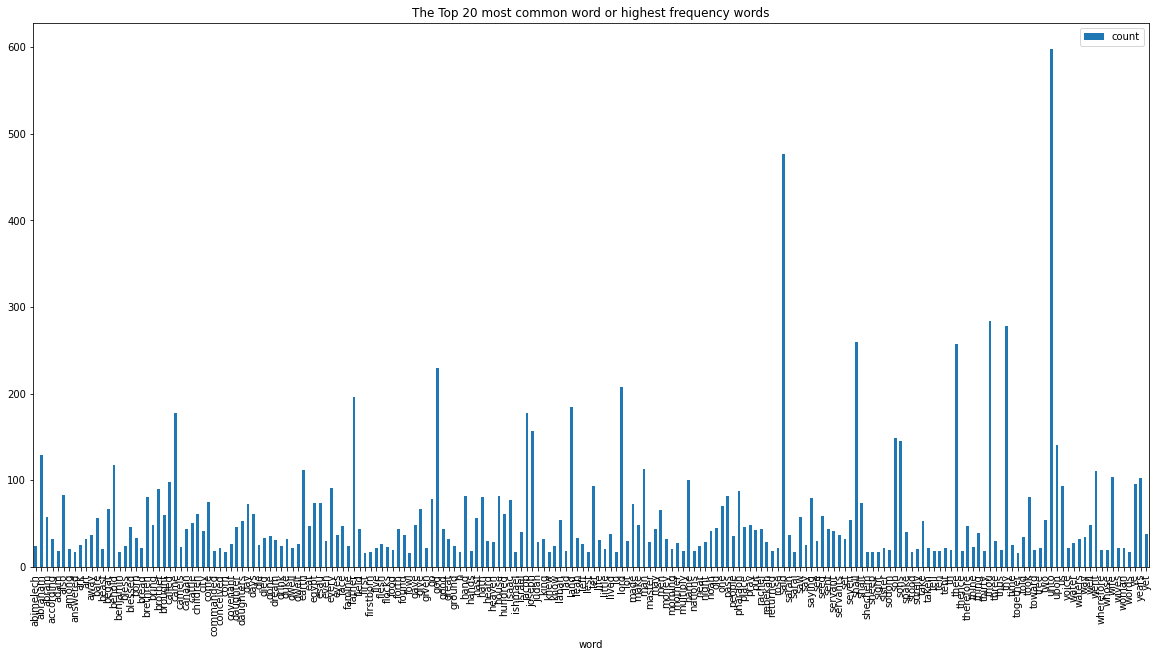

In [392]:
common_word = nltk.FreqDist(words).most_common(200) #

df200w = pd.DataFrame(data = common_word, columns = ['word','count'])
df200w= pd.DataFrame([{'word': k, 'count': (v['count'].sum())} for k,v in df200w.groupby(['word'])], columns = ['word','count'])
#df200w.plot(kind="line", x="word", y="count", figsize = (20,10))
df200w.plot(kind="bar", x="word", y="count",title = "The Top 20 most common word or highest frequency words", figsize = (20,10))


###### Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf’s Law is a statistical distribution in certain data sets, such as words in a linguistic corpus, in which the frequencies 
of certain words are inversely proportional to their ranks

https://www.techtarget.com/whatis/definition/Zipfs-Law

Looking at the top 200 

###### In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Do I even know the bible, the books of genesis has 50 chapters...I am not sure the text3 file has all 50 chapters or just one. 

According to: https://holyword.church/miscellaneous-resources/how-many-words-in-each-book-of-the-bible/
    
there are 38262 words all the 50 chapters of Genesis...This is close to our text3. Then we call the bible the corpora...
This means the frequency of the words in this text3 will be about the same compare to books of same size like Isaiah , Ezekiel


In [393]:
df1 = pd.read_csv('C:\\Users\\owner\\Downloads\\bible_book.csv',encoding='latin' )
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df1)

,Book,Chapters,Verses,Words,Author,Genre,OT_NT
0,3_John,1,14,294,John,Letter,NT
1,2_John,1,13,298,John,Letter,NT
2,Philemon,1,25,430,Paul,Letter,NT
3,Jude,1,25,608,Jude,Letter,NT
4,Obadiah,1,21,669,Obadiah,Prophecy,OT
5,Titus,3,46,896,Paul,Letter,NT
6,2_Thessalonians,3,47,1022,Paul,Letter,NT
7,Haggai,2,38,1130,Haggai,Prophecy,OT
8,Nahum,3,47,1284,Nahum,Prophecy,OT
9,Jonah,4,48,1320,Jonah,Prophecy,OT


In [394]:
df1['Book']

0       3_John
1       2_John
2     Philemon
3         Jude
4      Obadiah
        ...   
61      Isaiah
62     Genesis
63     Ezekiel
64    Jeremiah
65      Psalms
Name: Book, Length: 66, dtype: object

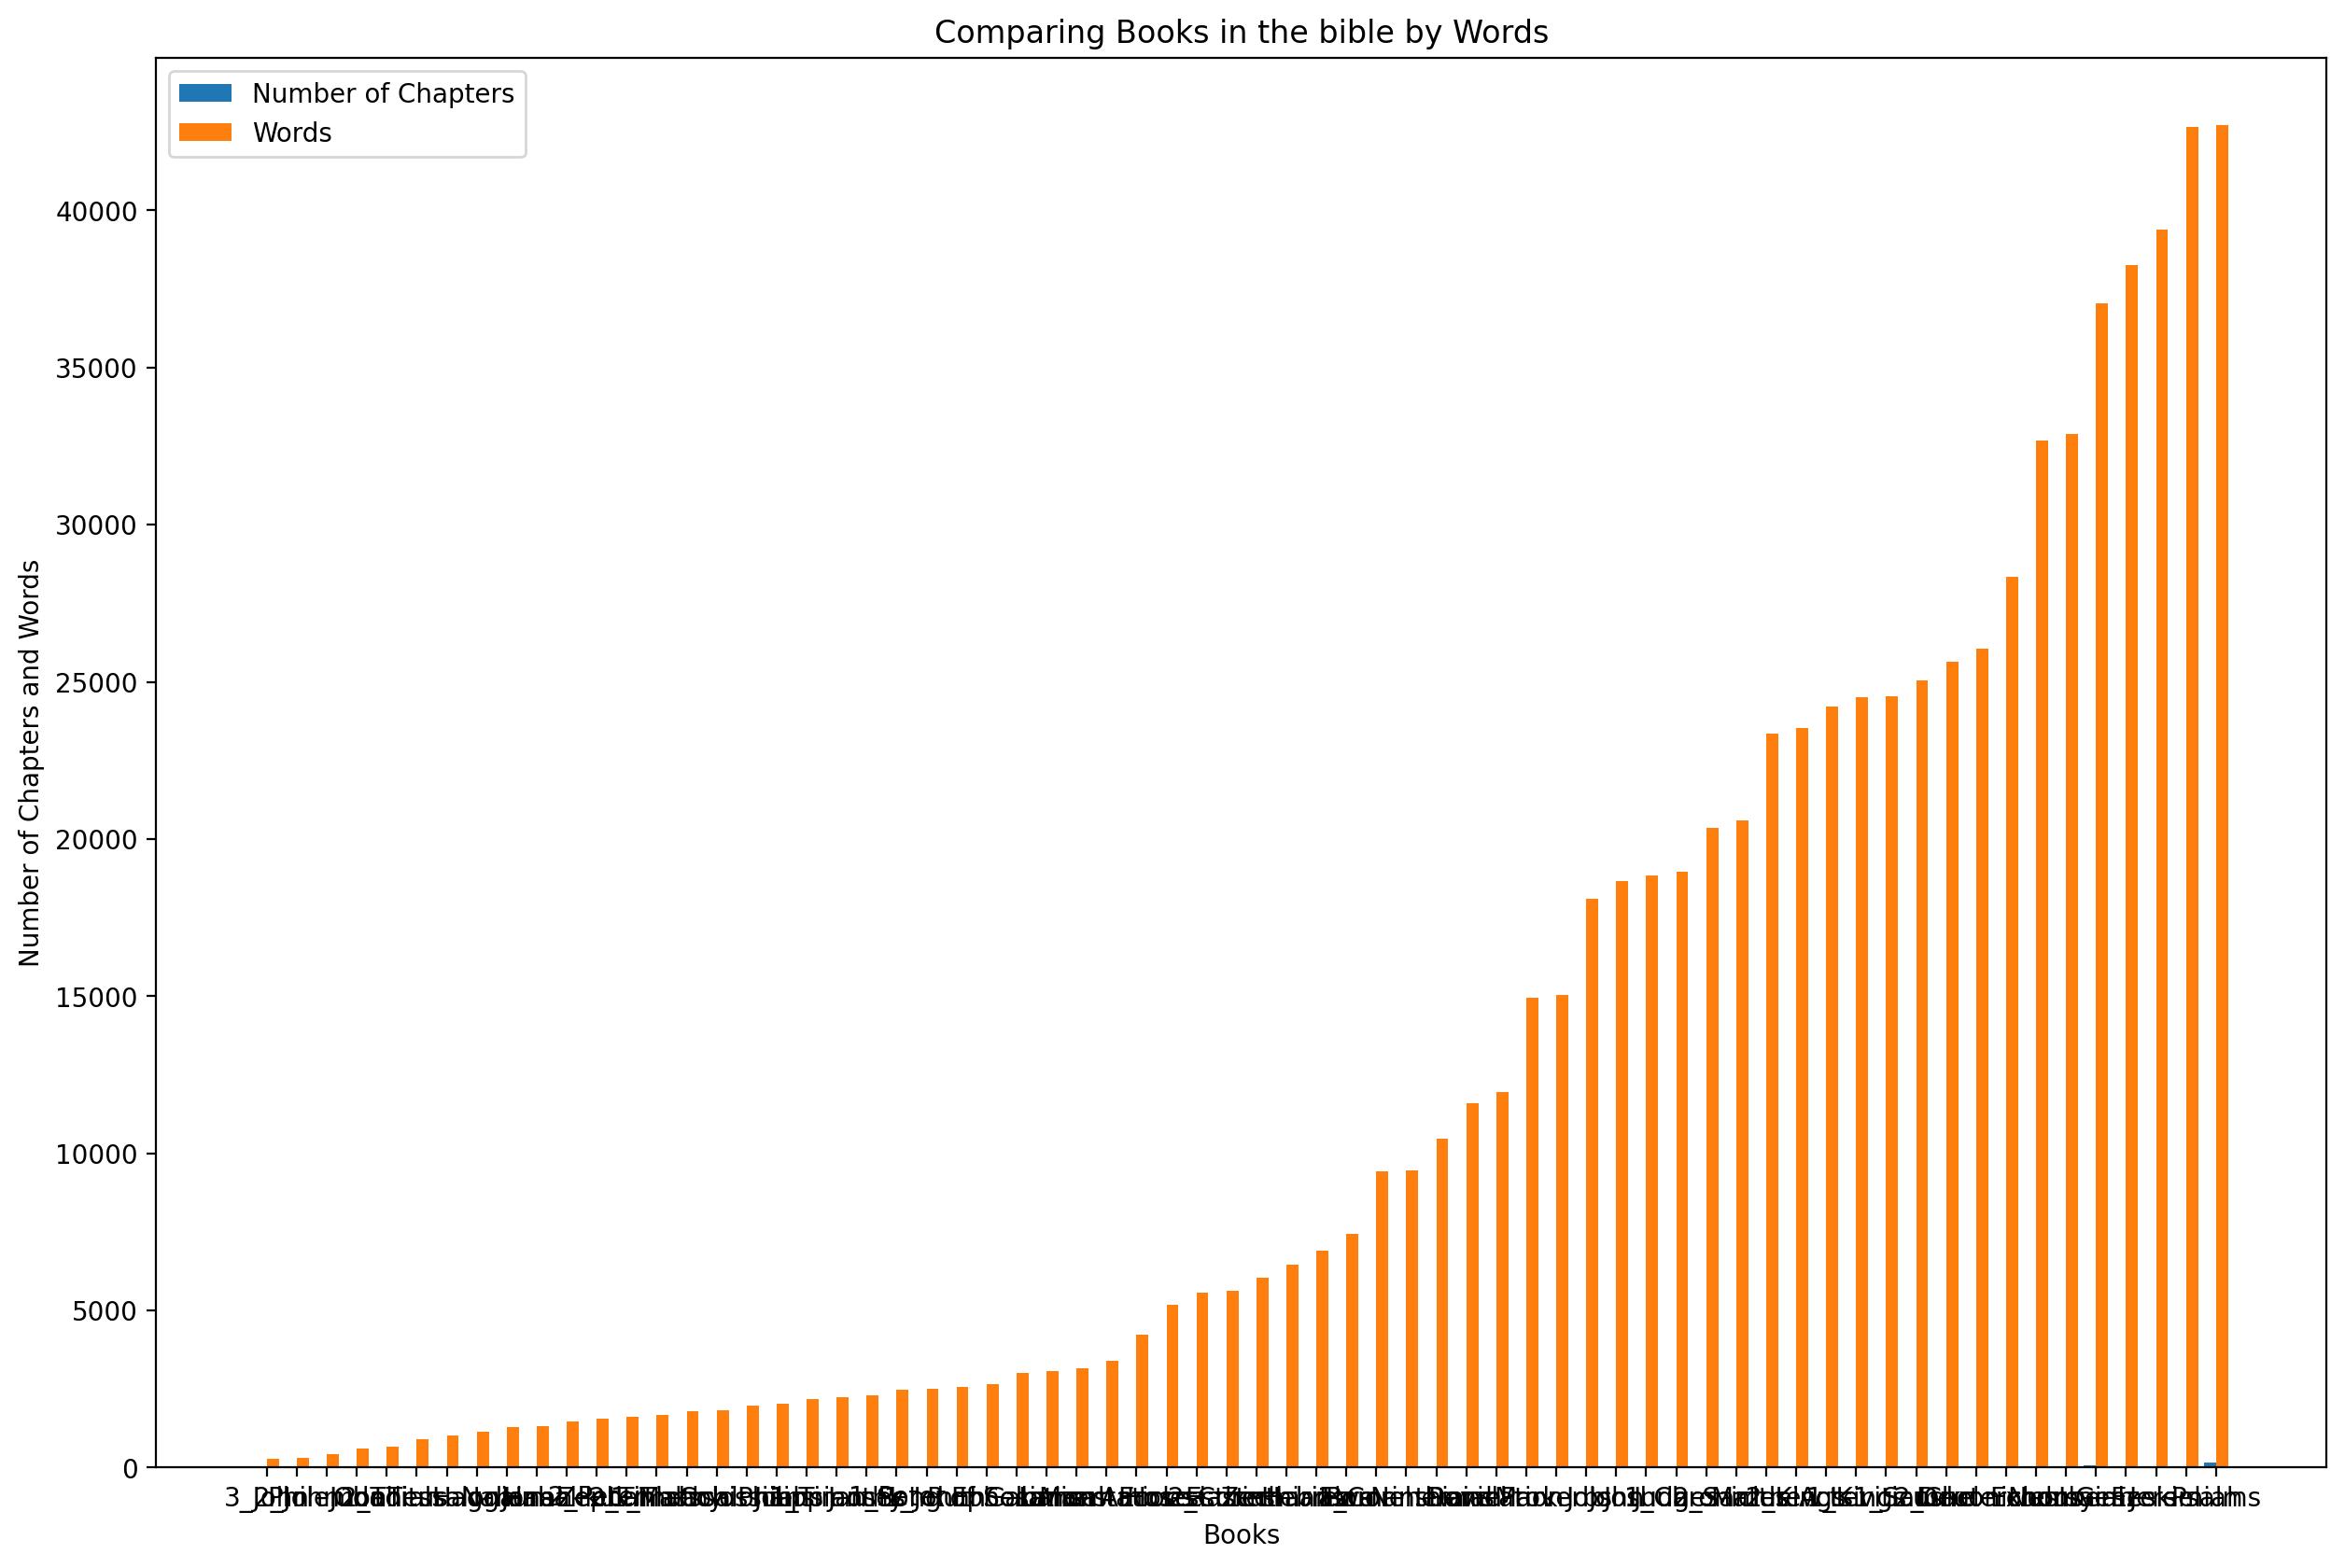

In [395]:
fig = plt.figure(1, figsize=(15,10), dpi=200)

X_axis = np.arange(len(df1['Book']))
  
plt.bar(X_axis - 0.2, df1['Chapters'], 0.4, label = 'Number of Chapters')
plt.bar(X_axis + 0.2, df1['Words'], 0.4, label = 'Words')
  
plt.xticks(X_axis, df1['Book'])
plt.xlabel("Books")
plt.ylabel("Number of Chapters and Words")
#plt.gca().invert_X_axis()
#ax.invert_Xaxis()
plt.title("Comparing Books in the bible by Words")
plt.legend()
plt.show()


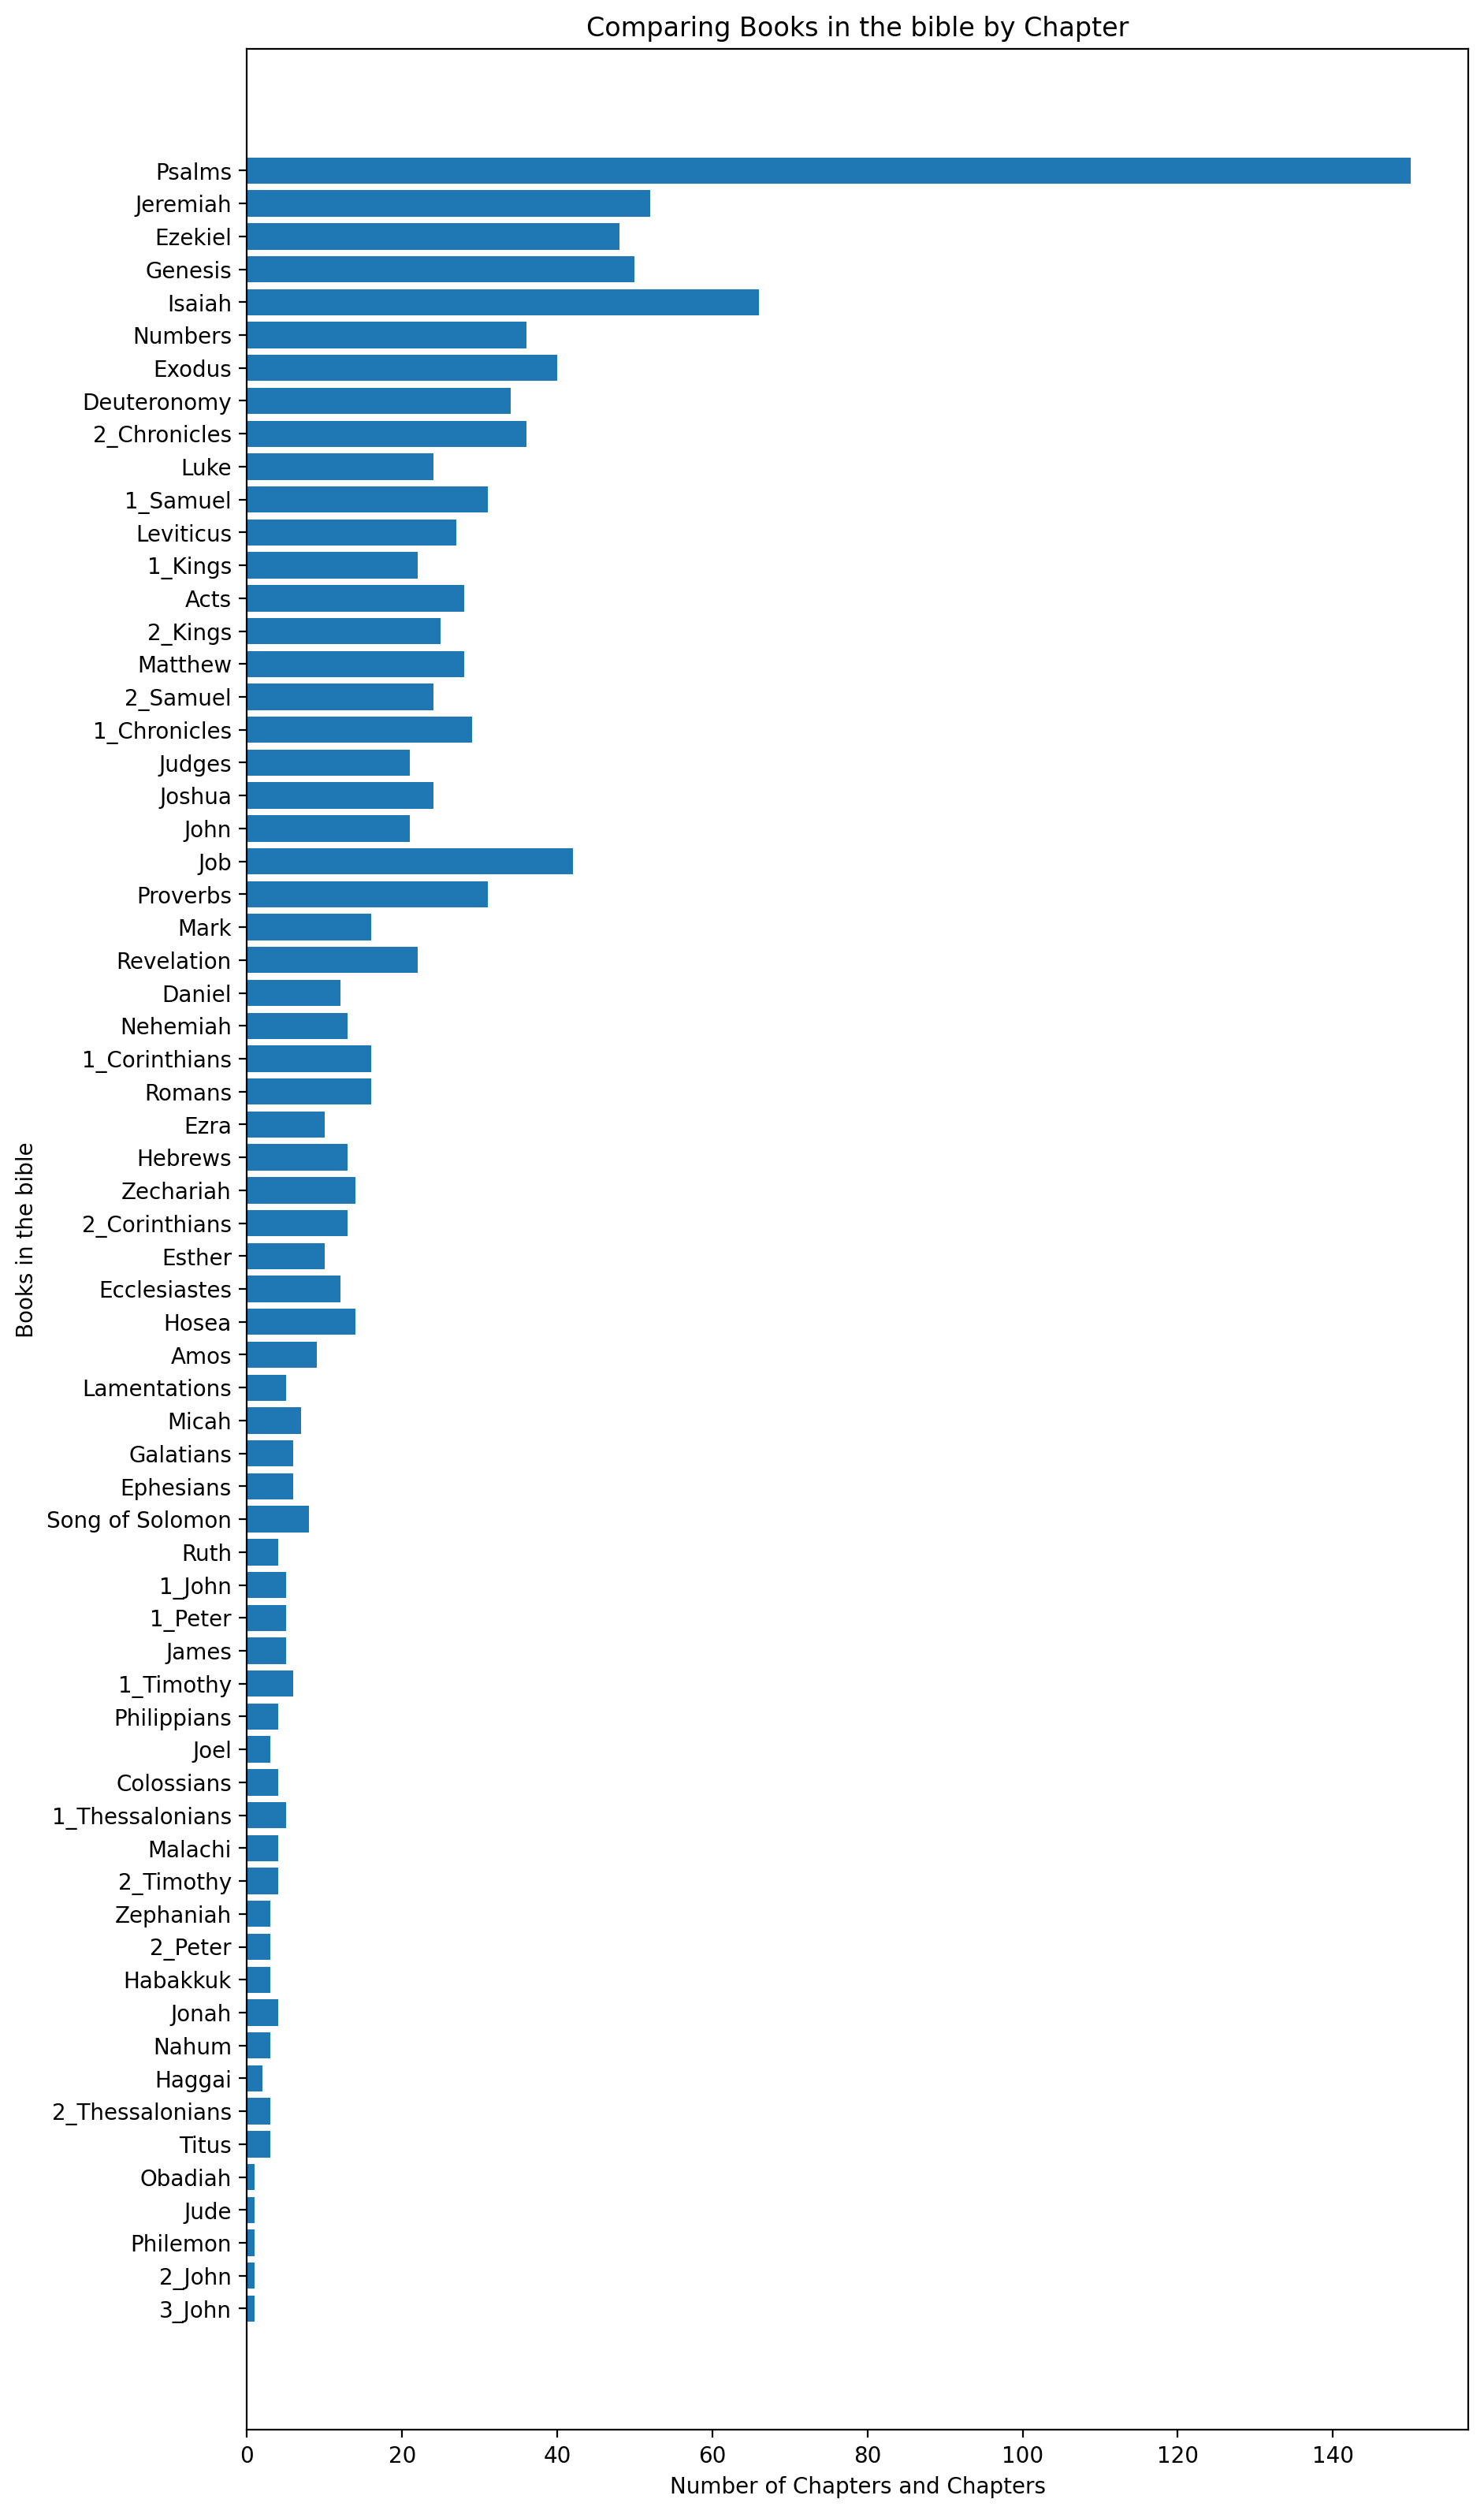

In [396]:
fig = plt.figure(1, figsize=(10,20), dpi=200)

#df1a = df1[['Chapters', 'Words']]
#df2 = pd.DataFrame(df1a,columns=['Chapters'], index = df1['Book'])

plt.barh(df1['Book'], df1['Chapters'] )

plt.title('Comparing Books in the bible by Chapter')
plt.ylabel('Books in the bible')
plt.xlabel('Number of Chapters and Chapters')
plt.show()

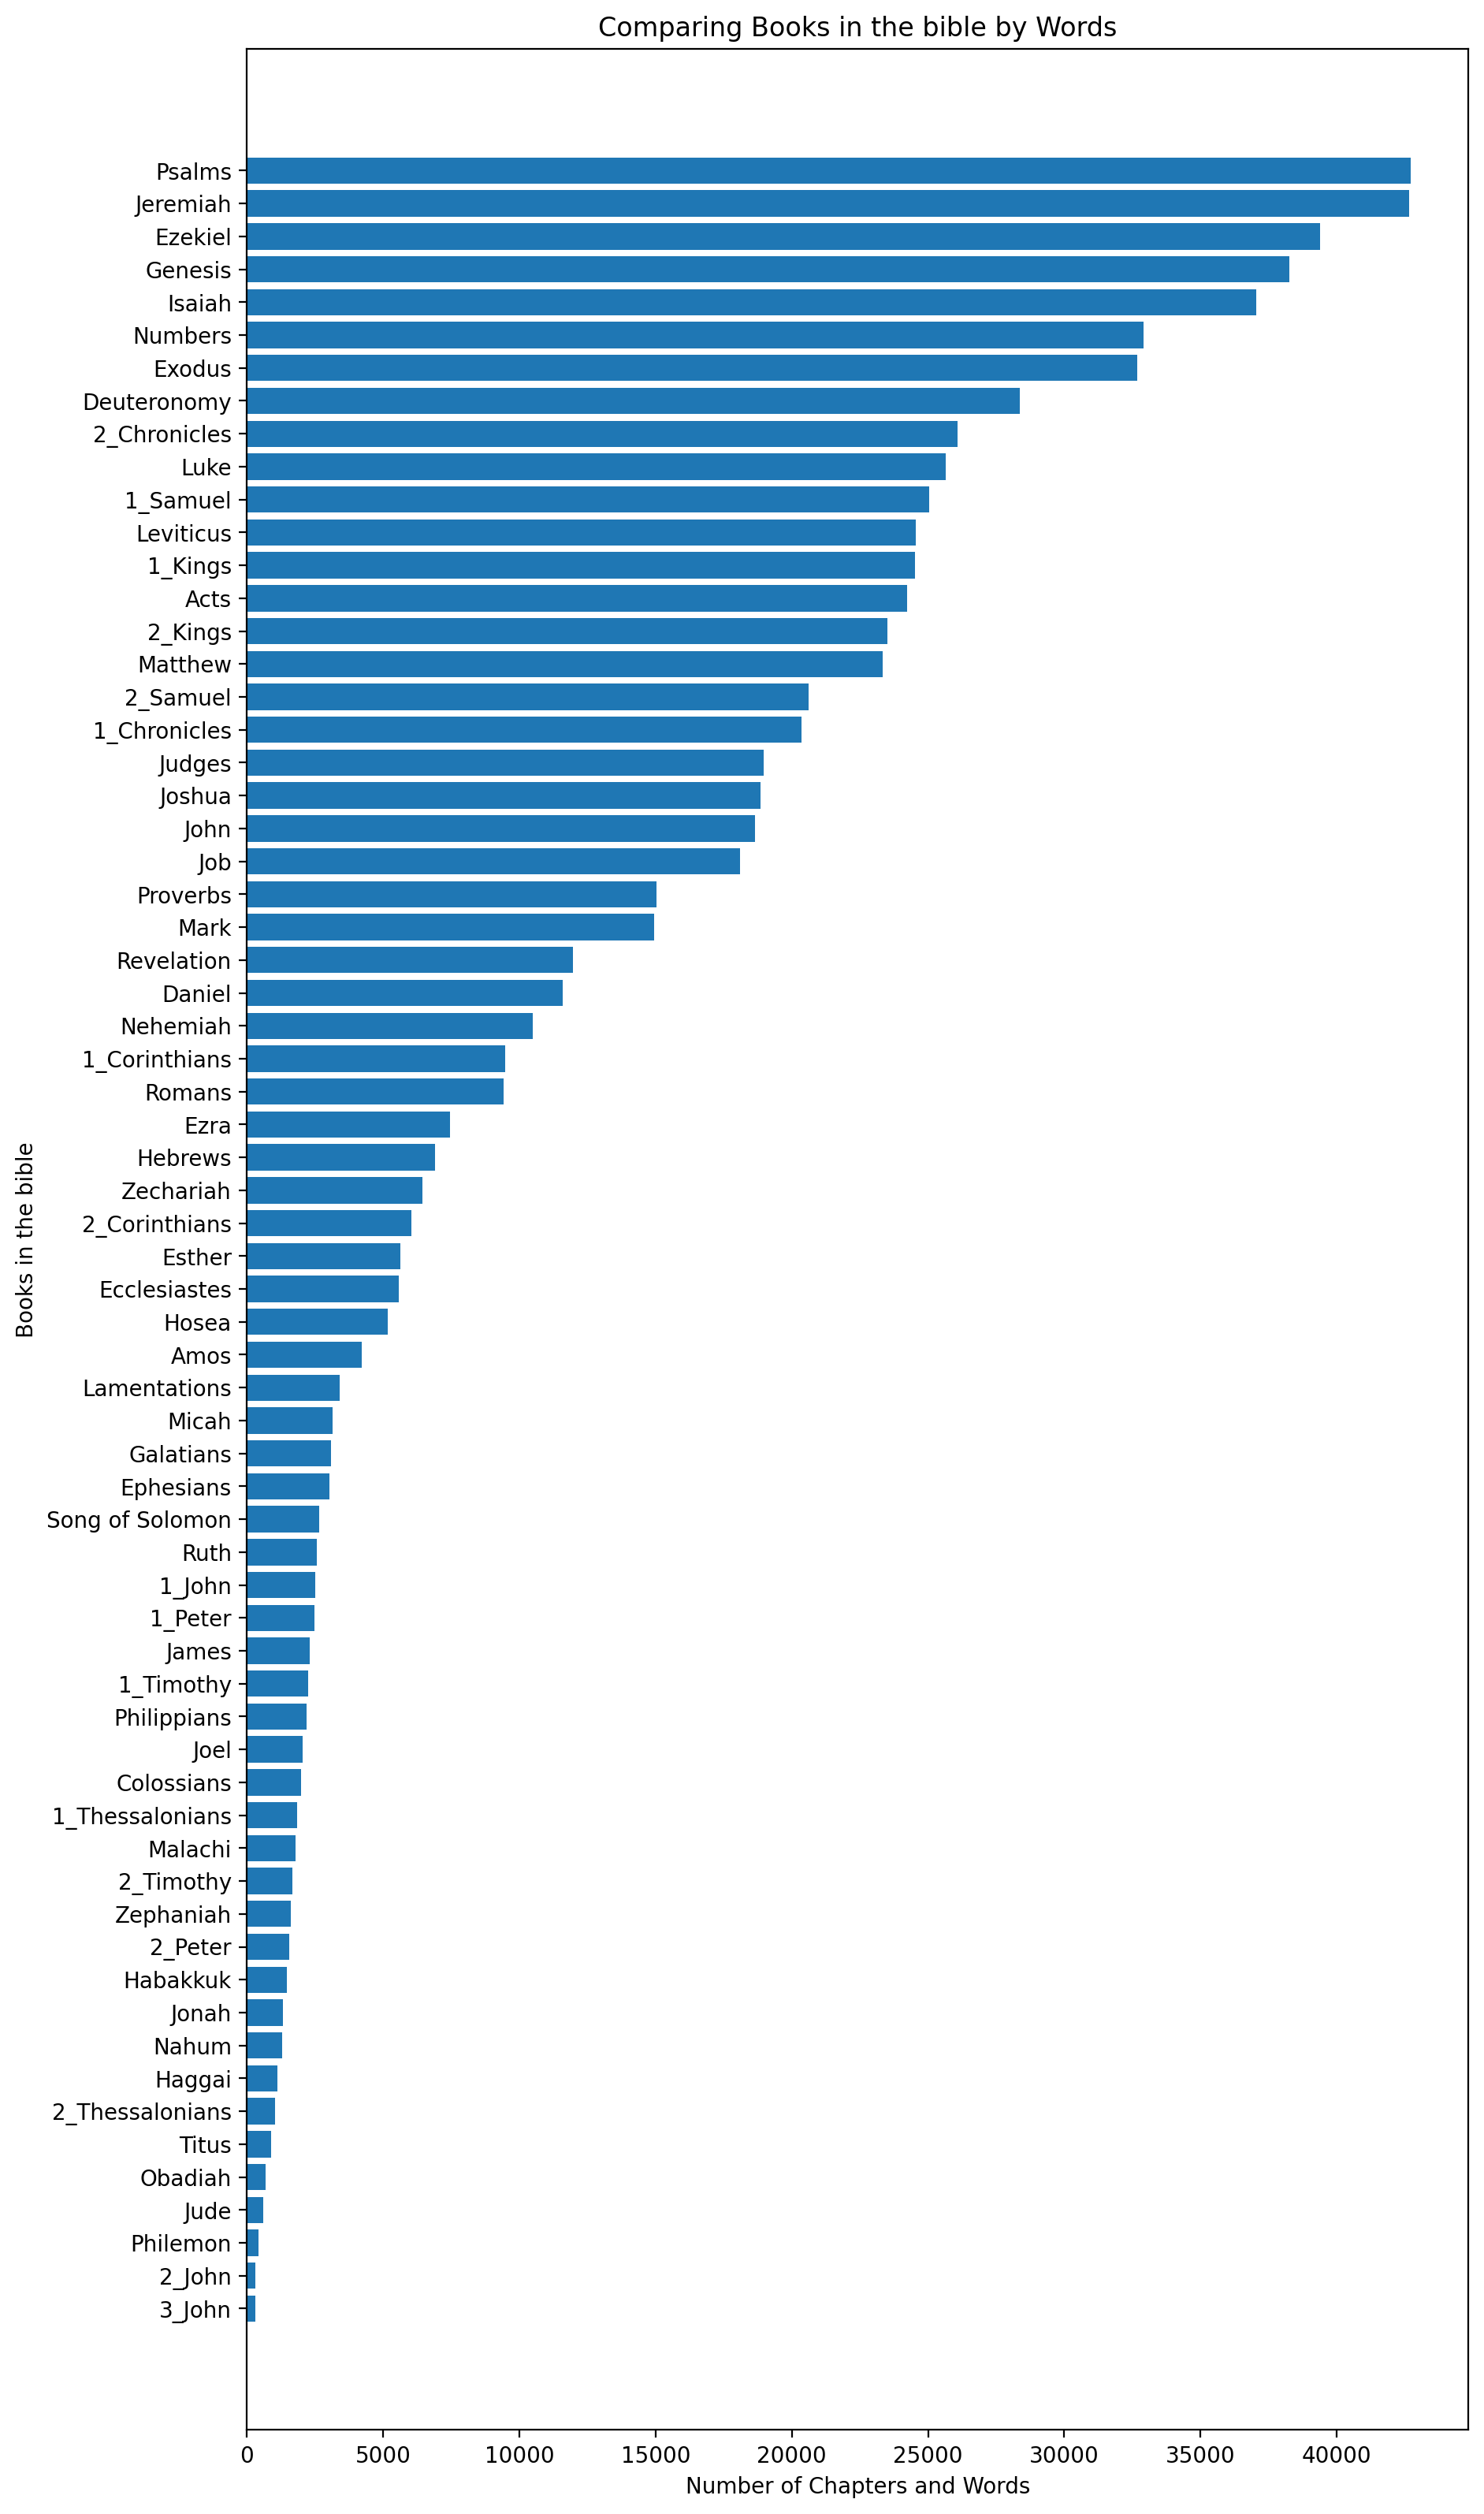

In [397]:
fig = plt.figure(1, figsize=(10,20), dpi=200)

#df1a = df1[['Chapters', 'Words']]
#df2 = pd.DataFrame(df1a,columns=['Chapters'], index = df1['Book'])

plt.barh(df1['Book'], df1['Words'] )

plt.title('Comparing Books in the bible by Words')
plt.ylabel('Books in the bible')
plt.xlabel('Number of Chapters and Words')
plt.show()